In [3]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

In [4]:
def heun_ode(f, y0, xs, n_corrections = 1):
    """
    param f:
        좌변 상미분 방정식 y' = f(y, x)
    param y0:
        초기 값 y0 = y(x0)
    param xs:
        y 값을 추정하기 위한 x 값의 리스트
    param n_corrections:
        Corrector step의 반복 횟수
    """
    
    ys = [y0] * len(xs) # ys 리스트 만들어 주기
    for i, (x_curr, x_next) in enumerate(zip(xs[:-1], xs[1:])):
        y_curr = ys[i]
        h = x_next - x_curr

        # predictor fomula as it is
        dydx = f(x_curr, y_curr)
        y_next = y_curr + h * dydx
        
        # corrector fomula as it is
        for j in range(n_corrections):
            y_next = y_curr + 0.5 * h * (dydx + f(x_next, y_next)) 
            #y_next 값이 계속 들어가면서, 원하는 횟수 까지 계속해서 correct가 일어남.
            
        ys[i + 1] = y_next # 모든 y에 대하여 predictor과 corrector이 다 이루어져야 하니, 전체를 다하게끔.
        
    return ys
        

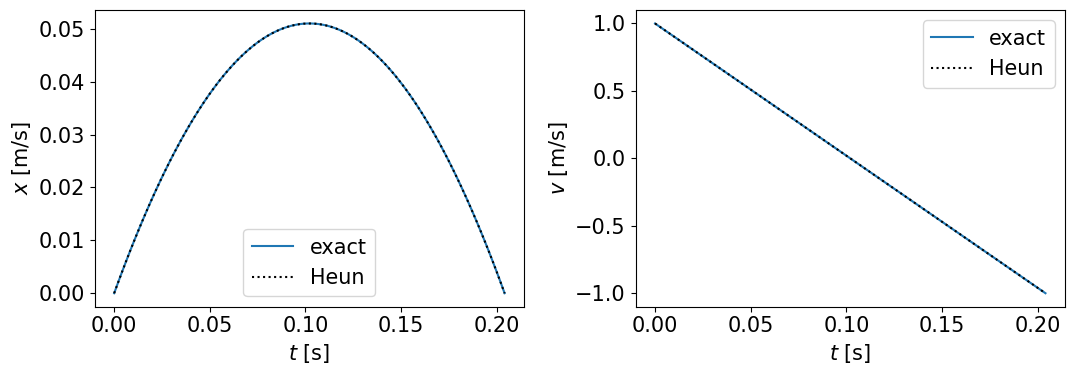

In [5]:
g = 9.8 # m/s
def F(t, Y): # F = [v, -g], Y = [x, v]
    F = [Y[1],-g]
    #print(Y)
    return np.array(F) # F 면 안된다. array type으로 형태를 변환해야함. 
    # 도저히 이해가 안되는 코드.?????

t = np.linspace(0, 2/g, 100) #t의 범위, 100개 단위로 쪼갠다.
Y_0 = np.array([0, 1]) #초기 값을 각각 저장. 행렬로
x, v = zip(*heun_ode(F, Y_0, t))#추산한, x와 v의 값을 각각 넣어줌.

plt.figure(figsize = [11, 4])

plt.subplot(1, 2, 1)
plt.plot(t, -g/2*t**2 + t, '-', t, x, ':k')
plt.legend(["exact", "Heun"])
plt.xlabel("$t$ [s]")
plt.ylabel("$x$ [m/s]")

plt.subplot(1, 2, 2)
plt.plot(t, -g*t + 1, '-', t, v, ':k')
plt.legend(["exact", "Heun"])
plt.xlabel("$t$ [s]")
plt.ylabel("$v$ [m/s]")

plt.tight_layout()
plt.show()